# Affective signals - II
----

<span style="color:Blue">**Through this notebook we hope you get an hands on approach to the seminar. 
    Below you will find code snippets and theory that will help you apply the libraries that will be introduced to you in the course.**</span>

----


In [2]:
import numpy as np
import pandas as pd

import subprocess
import time
import os

import matplotlib.pyplot as plt 

import re
import seaborn as sns
sns.set()
import math

## Eyes
This part of the notebook is focused on the analysis of eye gaze behavior.
Fortunately, the OpenFace-library already includes features regarding the gaze behavior.
Check out the .csv and explore the gaze-related features.

-----

### Eye Gaze
Gaze_angle_x, Gaze_angle_y are features that include eye gaze direction expressed in radians in world coordinates averaged for both eyes. If a person is looking left-right this will results in the change of gaze_angle_x (from positive to negative) and, if a person is looking up-down this will result in change of gaze_angle_y (from negative to positive), if a person is looking straight ahead both of the angles will be close to 0 (within measurement error).

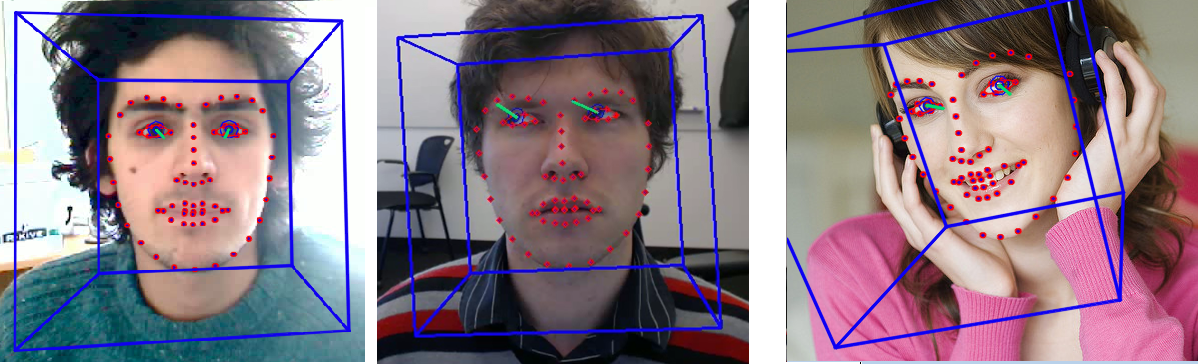 [source](https://github.com/TadasBaltrusaitis/OpenFace/wiki)

In [3]:
#load the csv file using pandas
#change the file path accordingly
df_gaze = pd.read_csv("/home/Notebooks/processed/BA_zoom.csv")

In [ ]:
#plot for gaze angles (source https://towardsdatascience.com/how-to-extract-facial-expressions-head-pose-and-gaze-from-any-youtube-video-2aa6590c2bb6)
f,axes = plt.subplots(2,1, figsize=(10,5))
df_gaze.plot.scatter(x='gaze_angle_x', y='gaze_angle_y', ax=axes[0])
axes[0].scatter(0,0, marker='x', color = 'k') # draw origin.
axes[0].set(xlim=[-2,2], ylim=[-2,2], title=f'Gaze movement')
df_gaze[['gaze_angle_x', 'gaze_angle_y']].plot(ax=axes[1])
axes[1].set(ylim=[-1.5,1.5])
axes[1].set_xlabel("Time steps")
plt.tight_layout()
plt.show()

##### Task 2.1: Calculate the mean of the angles of your individual gaze in the video

In [ ]:
###############################
#     your code goes here     #
###############################




##### Task 2.2: Calculate the variance of the angles of your individual gaze in the video

In [ ]:
###############################
#     your code goes here     #
###############################




##### Task 2.3: Calculate the total time you're looking straight ahead.

In [ ]:
###############################
#     your code goes here     #
###############################






#### Task 2.4 : Find if the gaze is a fixation or a saccade, based on velocity a threshold of 20 deg/s

Heres the original paper that gives the pseudocode for different algoirthms on how to classify a fixation or a saccade https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.68.2459&rep=rep1&type=pdf

Below you will implement the Velocity-Threshold Identification algorithm.

In [40]:
###############################
#     your code goes here     #
###############################

#get the difference between the angles and the timestamp.This will be used to calculate the velocity

#use this to calculate the velocity(magnitude)(dx/dt, dy/dt)

#as angles are in radians convert it to degree per second

# fixation and saccades are differentiated based on the velocity
# fixation is when velocity is less than 20 deg/s
# saccades is when velocity is greater than 20 deg/s




### Blinking

Blinking is a activity of closing the eyelids to lubricate the eyes. Blinking frequency depends on various factors such as the time of day and also the task the person is performing. Analysis of blinks helps to uncover patterns within the blinks that can help in detecting deep fakes.[source](https://ieeexplore.ieee.org/document/9072088)


To calculate the number of blinks we will use EAR (Eye-Aspect ratio). EAR takes six points($p_i$) around the eyes and calculates the absolute area of the horizontal axis and vertical axis.

$EAR = \frac{||p_2-p_6||+||p_3-p_5||}{2*||p_1 - p_4||}$

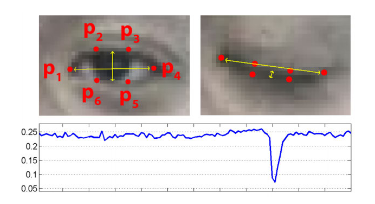
[source](https://ieeexplore.ieee.org/document/9072088)

The above image shows you the landmark that is used to get the Horizontal and vertical axis.



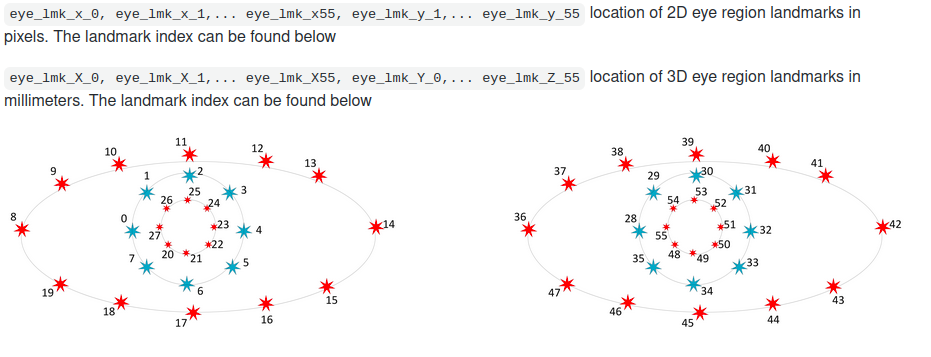 [source](https://github.com/TadasBaltrusaitis/OpenFace/wiki)

Above you can see the co-ordinates that are provided by Openface that  we can use to calculate the EAR.

##### Task 2.5: Calculate the EAR .
Hint : Closly look at the formula for EAR above and see what are the points that you need to extract from the dataframe. Also remember that you are each frame has a EAR that can be calculated. 

In [8]:
#calculation of the ear 
def EAR(df):
    """Define a funciton that calculates the EAR for both eyes"""

    ###############################
    #     your code goes here     #
    ###############################
    
    #hint: remember that you EAR changes with time and 
    # you need to calculate the EAR at every time stamp 
    
    
    
    
    

In [9]:
ear_l ,ear_r = EAR(df_gaze)

##### Task 2.6: Plot the calculated EAR values per frame, the mean of EAR values as a horizontal line and mean - 2 * Standard deviation line(threshold line). 

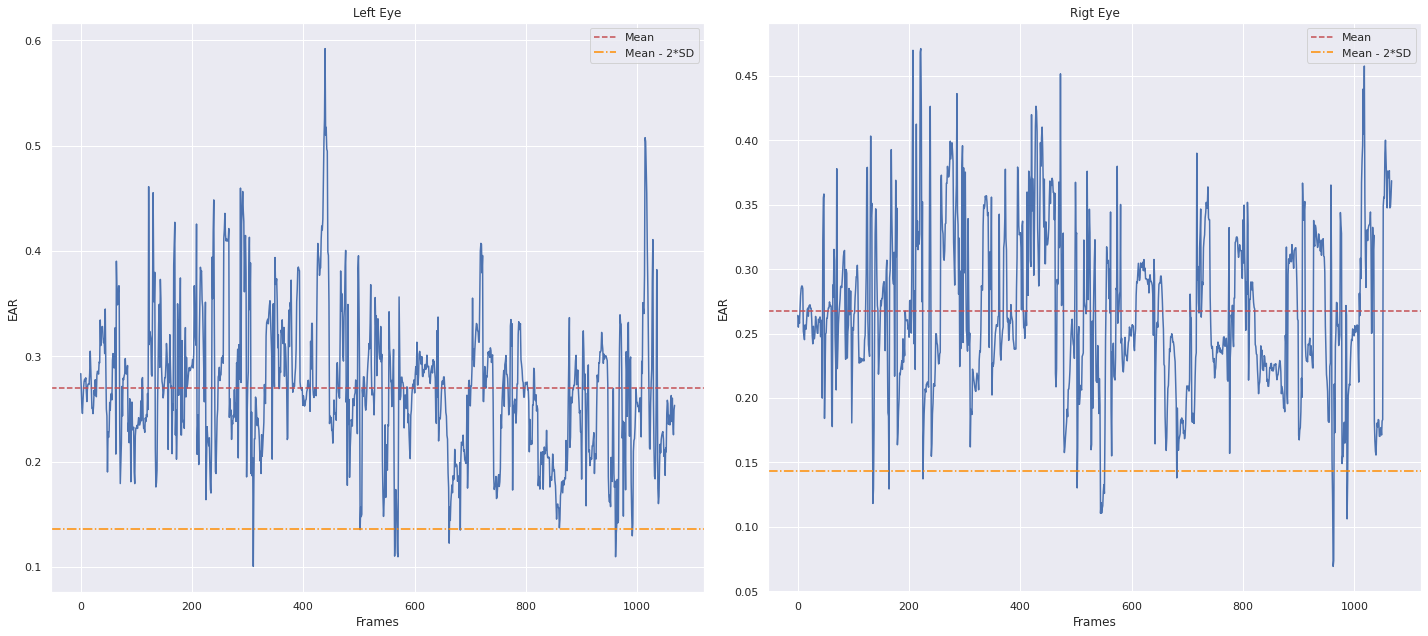

In [10]:
###############################
#     your code goes here     #
###############################

# You should have two ear values per frame. ( left eye EAR and right eye EAR)
# Plot the ear values with x-axis as frames from the csv






##### Task 2.7: Try to check the number of times you blink from the graph (you can do this by counting how many times the ear values exceeds the threshold line) and also try to compare this to the number of blinks that you calculated from Notebook 1(using the AU_45) 

##### Your observations: 

### Pupil Size
The pupil is a black hole located in the center of the iris of the eye that allows light to strike the retina. The amount of light is controlled by the the iris by regulating the pupil size. Pupil size has various links to congitive processes.

Similar to EAR we can use the co-ordinates that are provided by Openface to calculate the pupil size.


##### Task 2.8: Write a funciton to calculate the area of a circle .

In [11]:
def Area_pupils(x, y):
    """
    Returns the area of a  circle
    """
    ###############################
    #     your code goes here     #
    ###############################
    
    


In [12]:
# Look at the eye landmark diagram again and find the two points that can be used to fine the area of the pupil
# pass those two values to the function you wrote above.

###############################
#     your code goes here     #
###############################





##### Task 2.9:Plot how the pupil area varies with time(frames).

Text(0.5, 0, 'Frames')

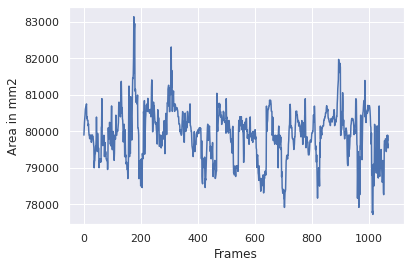

In [15]:
###############################
#     your code goes here     #
###############################





##### Task 2.10: Calculate the mean of Pupil size.

In [ ]:
###############################
#     your code goes here     #
###############################




##### Task 2.11: Calculate the min and maximum of the pupil size.

In [ ]:
###############################
#     your code goes here     #
###############################




##### Task 2.12: Split your dataframe into three parts based on the time-elapsed( 30 second video into 3 (10second ) parts) , check how the average pupil size changes over the different parts. 

In [ ]:
###############################
#     your code goes here     #
###############################


